In [9]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

df_2022 = pd.read_csv("C:/Users/ajala/Downloads/DATA SCIENCE/Udacity/stack-overflow-developer-survey-2022/survey_results_public.csv")
df_2021 = pd.read_csv("C:/Users/ajala/Downloads/DATA SCIENCE/Udacity/stack-overflow-developer-survey-2021/survey_results_public.csv")
df_2020 = pd.read_csv("C:/Users/ajala/Downloads/DATA SCIENCE/Udacity/stack-overflow-developer-survey-2020/survey_results_public.csv")
df_2019 = pd.read_csv("C:/Users/ajala/Downloads/DATA SCIENCE/Udacity/stack-overflow-developer-survey-2019/survey_results_public.csv")
df_2018 = pd.read_csv("C:/Users/ajala/Downloads/DATA SCIENCE/Udacity/stack-overflow-developer-survey-2018/survey_results_public.csv")
df_2017 = pd.read_csv("C:/Users/ajala/Downloads/DATA SCIENCE/Udacity/stack-overflow-developer-survey-2017/survey_results_public.csv")

df_2018['year'] = '2018'
df_2019['year'] = '2019'
df_2020['year'] = '2020'
df_2021['year'] = '2021'
df_2022['year'] = '2022'

df_18 = df_2018.rename({'Salary': 'CompTotal', 'LanguageWorkedWith':'LanguageHaveWorkedWith', 'LanguageDesireNextYear':'LanguageWantToWorkWith', 'FormalEducation':'EdLevel'}, axis=1)
df_19 = df_2019.rename({'LanguageWorkedWith':'LanguageHaveWorkedWith', 'LanguageDesireNextYear':'LanguageWantToWorkWith'}, axis=1)
df_20 = df_2020.rename({'LanguageWorkedWith':'LanguageHaveWorkedWith', 'LanguageDesireNextYear':'LanguageWantToWorkWith'}, axis=1)
                       
df18 = df_18[['year','LanguageHaveWorkedWith','LanguageWantToWorkWith','Employment','EdLevel','Age','CompTotal']]
df19 = df_19[['year','LanguageHaveWorkedWith','LanguageWantToWorkWith','Employment','EdLevel','Age','CompTotal']]
df20 = df_20[['year','LanguageHaveWorkedWith','LanguageWantToWorkWith','Employment','EdLevel','Age','CompTotal']]
df21 = df_2021[['year','LanguageHaveWorkedWith','LanguageWantToWorkWith','Employment','EdLevel','Age','CompTotal']]
df22 = df_2022[['year','LanguageHaveWorkedWith','LanguageWantToWorkWith','Employment','EdLevel','Age','CompTotal']]
pd.options.mode.chained_assignment = None  # default='warn'
                       
frames = [df18,df19,df20,df21,df22]
df_all = pd.concat(frames)
df_new = df_all.copy()
# df_new = df_all.copy()

### Popular Languages in Five Years

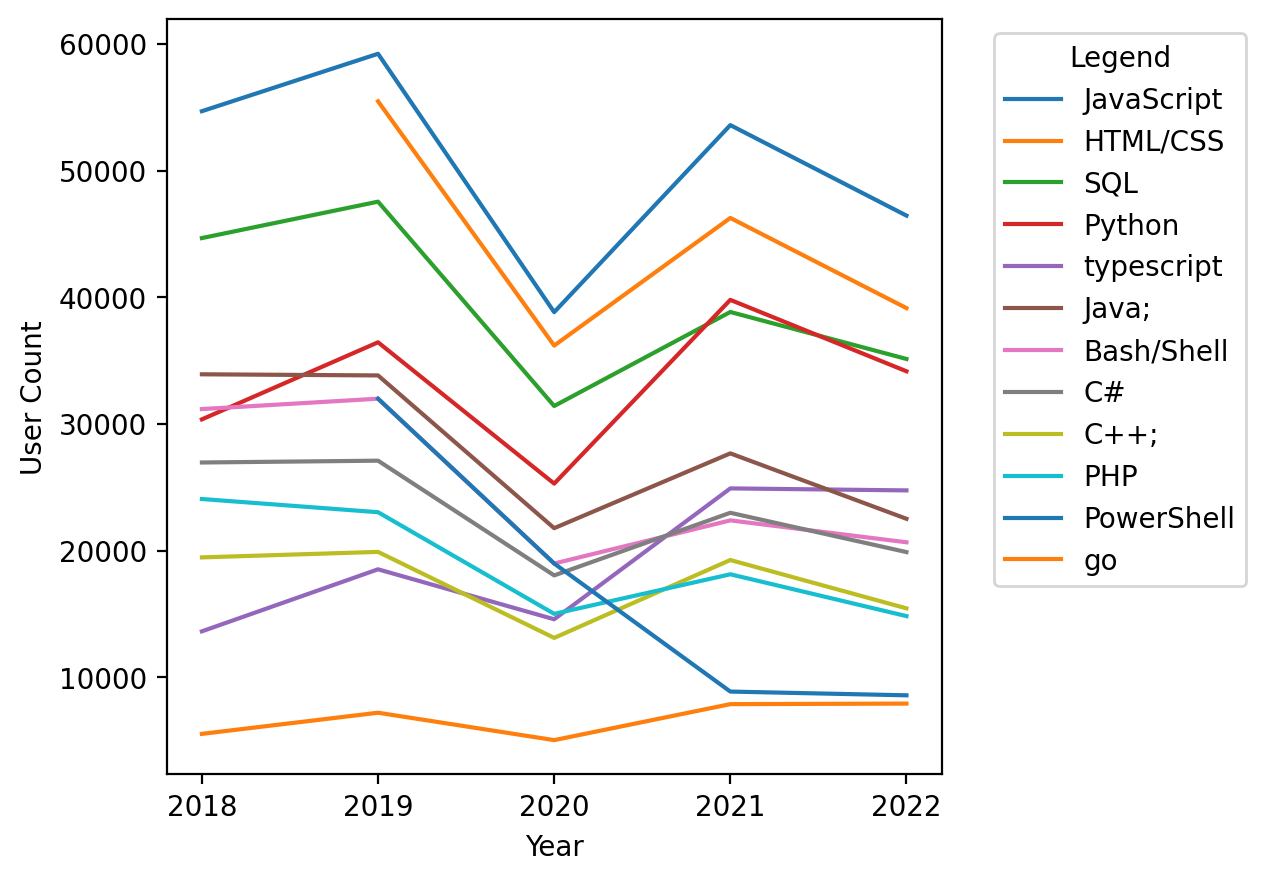

,JavaScript,HTML/CSS,SQL,Python,typescript,Java;,Bash/Shell,C#,C++;,PHP,PowerShell,go,year
year,,,,,,,,,,,,,
2018,54686,NaN,44670,30359,13626,33916,31172,26954,19463,24071,NaN,5532,2018
2019,59219,55466.0,47544,36443,18523,33827,31991,27097,19897,23030,31991.0,7201,2019
2020,38822,36181.0,31413,25287,14578,21770,18980,18041,13108,15007,18980.0,5038,2020
2021,53587,46259.0,38835,39792,24909,27674,22385,22984,19256,18130,8871.0,7879,2021
2022,46443,39142.0,35127,34155,24752,22511,20656,19883,15440,14827,8575.0,7922,2022


In [2]:
pd.options.mode.chained_assignment = None  # default='warn'

LAN_list = ["JavaScript","HTML/CSS","SQL","Python","typescript","Java;","Bash/Shell","C#","C++;","PHP","PowerShell",'go']
df_ll = df_new[df_new['LanguageHaveWorkedWith'].str.contains('Python', na = False , case = False)].groupby('year').count()
for i in LAN_list:
    if i == "C#" or i == "C++;":
        df_ll[i] = df_new[df_new['LanguageHaveWorkedWith'].str.contains(i, na = False, case = False, regex  = False )].groupby('year').count()['LanguageHaveWorkedWith']
    else:    
        df_ll[i] = df_new[df_new['LanguageHaveWorkedWith'].str.contains(i, na = False , case = False)].groupby('year').count()['LanguageHaveWorkedWith']
# df_LAN = df_ll.copy()
df_LAN = df_ll[LAN_list]
df_LAN['year'] = df_LAN.index
plt.figure(figsize=(5, 5), dpi=200)
for col in df_LAN.columns:
    if not col == 'year':
        plt.plot(df_LAN['year'], df_LAN[col], label=''+col)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left' , title = "Legend")
# plt.legend()
plt.xlabel('Year')
plt.ylabel('User Count')
plt.show()
df_LAN


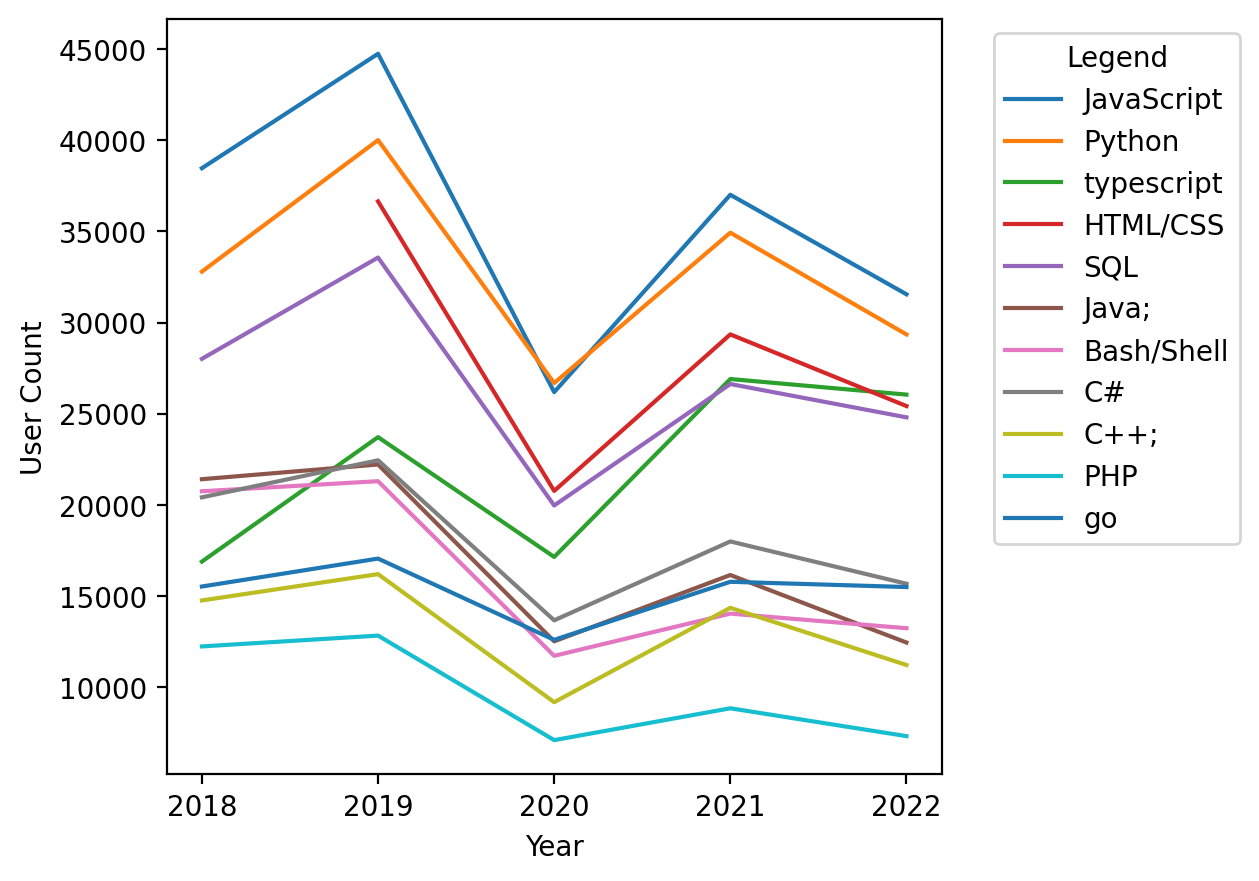

,JavaScript,Python,typescript,HTML/CSS,SQL,Java;,Bash/Shell,C#,C++;,PHP,go,year
year,,,,,,,,,,,,
2018,38465,32795,16896,NaN,28011,21413,20751,20419,14765,12244,15529,2018
2019,44739,40006,23720,36645.0,33566,22219,21303,22449,16208,12837,17060,2019
2020,26188,26682,17150,20771.0,19970,12522,11728,13674,9187,7106,12605,2020
2021,37008,34929,26905,29353.0,26631,16160,14043,17999,14362,8852,15788,2021
2022,31551,29350,26050,25423.0,24804,12457,13242,15681,11225,7325,15500,2022


In [3]:
pd.options.mode.chained_assignment = None  # default='warn'

LAN_list = ["JavaScript","Python","typescript","HTML/CSS","SQL","Java;","Bash/Shell","C#","C++;", "PHP",'go']
df_ll = df_new[df_new['LanguageWantToWorkWith'].str.contains('Python', na = False , case = False)].groupby('year').count()
for i in LAN_list:
    if i == "C#" or i == "C++;":
        df_ll[i] = df_new[df_new['LanguageWantToWorkWith'].str.contains(i, na = False, case = False, regex  = False )].groupby('year').count()['LanguageWantToWorkWith']
    else:    
        df_ll[i] = df_new[df_new['LanguageWantToWorkWith'].str.contains(i, na = False , case = False)].groupby('year').count()['LanguageWantToWorkWith']
# df_LAN = df_ll.copy()
df_LAN = df_ll[LAN_list]
df_LAN['year'] = df_LAN.index
plt.figure(figsize=(5, 5), dpi=200)
for col in df_LAN.columns:
    if not col == 'year':
        plt.plot(df_LAN['year'], df_LAN[col], label=''+col)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left' , title = "Legend")
# plt.legend()
plt.xlabel('Year')
plt.ylabel('User Count')
plt.show()
df_LAN

In [4]:
edlevel_list = ["Bachelor","Master","college/university","Secondary school",'Associate degree','doctoral','Primary/elementary','Professional']
df_1 = df_new[df_new['EdLevel'].str.contains("Bachelor", na = False , case = False)].groupby('year').count()
for i in edlevel_list:
    df_1[i] = df_new[df_new['EdLevel'].str.contains(i, na = False , case = False)].groupby('year').count()['EdLevel']
df_1

,LanguageHaveWorkedWith,LanguageWantToWorkWith,Employment,EdLevel,Age,CompTotal,Bachelor,Master,college/university,Secondary school,Associate degree,doctoral,Primary/elementary,Professional
year,,,,,,,,,,,,,,
2018,35596,33227,43287,43659,29261,23990,43659,21396,11710,8951,2970,2214,1656,1447
2019,38753,37186,38780,39134,35180,27117,39134,19569,10502,8642,2938,2432,1422,1198
2020,24641,23316,26443,26542,20457,16903,26542,13112,7239,4771,1843,1690,941,800
2021,35020,32732,35338,35357,34984,22665,35357,17512,10589,9534,2231,2567,2479,1256
2022,30013,28328,30267,30276,29985,18229,30276,15486,9326,7904,2236,2169,1806,1121


## which langauge is popular among which Educational level in 2022 

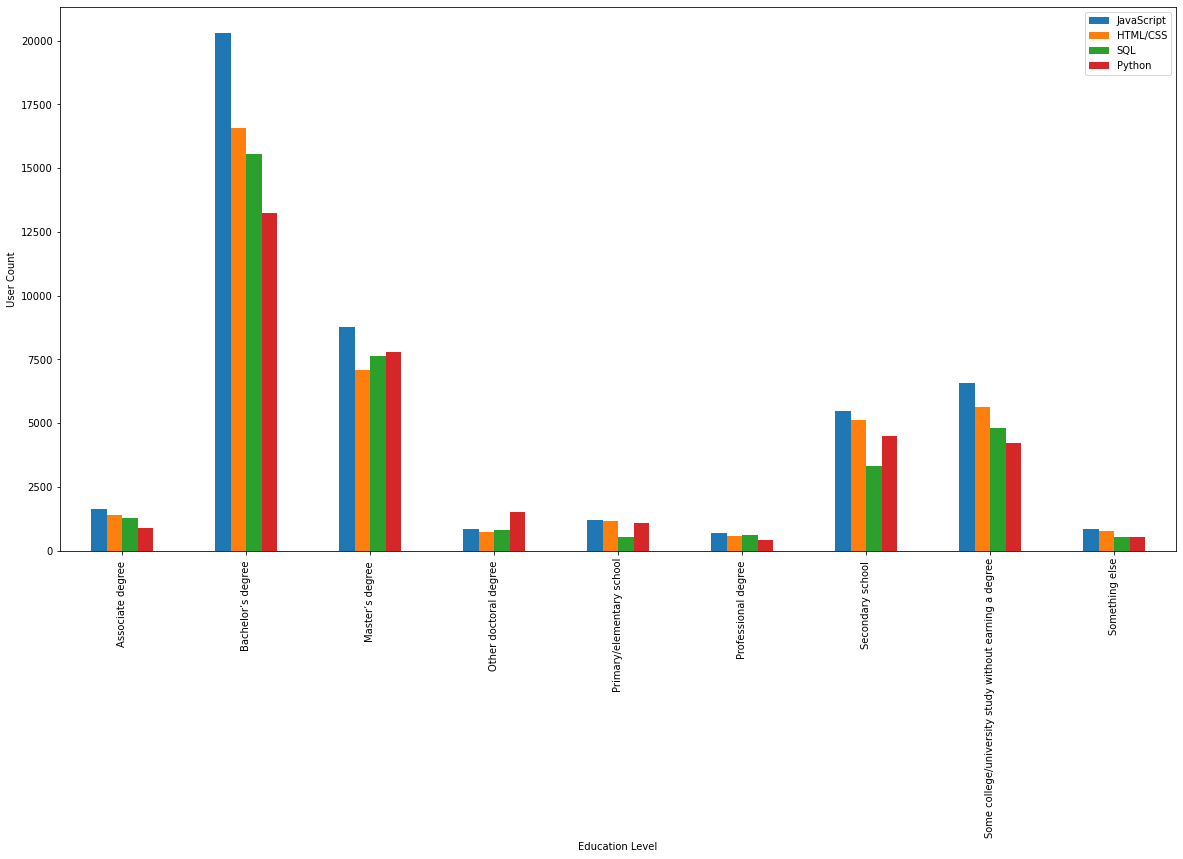

In [5]:
df22['EdLevel'] = df22['EdLevel'].str.replace(r"\(.*\)","")
LAN_list = ["JavaScript","HTML/CSS","SQL","Python","typescript","Java;","Bash/Shell","C#","C++;", "PHP",'go']
df_ll = df22[df22['LanguageHaveWorkedWith'].str.contains('Python', na = False , case = False)].groupby('EdLevel').count()
for i in LAN_list:
    if i == "C#" or i == "C++;":
        df_ll[i] = df22[df22['LanguageHaveWorkedWith'].str.contains(i, na = False, case = False, regex  = False )].groupby('EdLevel').count()['LanguageHaveWorkedWith']
    else:    
        df_ll[i] = df22[df22['LanguageHaveWorkedWith'].str.contains(i, na = False , case = False)].groupby('EdLevel').count()['LanguageHaveWorkedWith']
# df_ll[LAN_list].plot(kind = 'bar', figsize = (20,10))
df_ll[["JavaScript","HTML/CSS","SQL","Python"]].plot(kind = 'bar', figsize = (20,10))
plt.xlabel('Education Level')
plt.ylabel('User Count')
plt.show()

## which langauge want to work with among different Education levels in 2022 

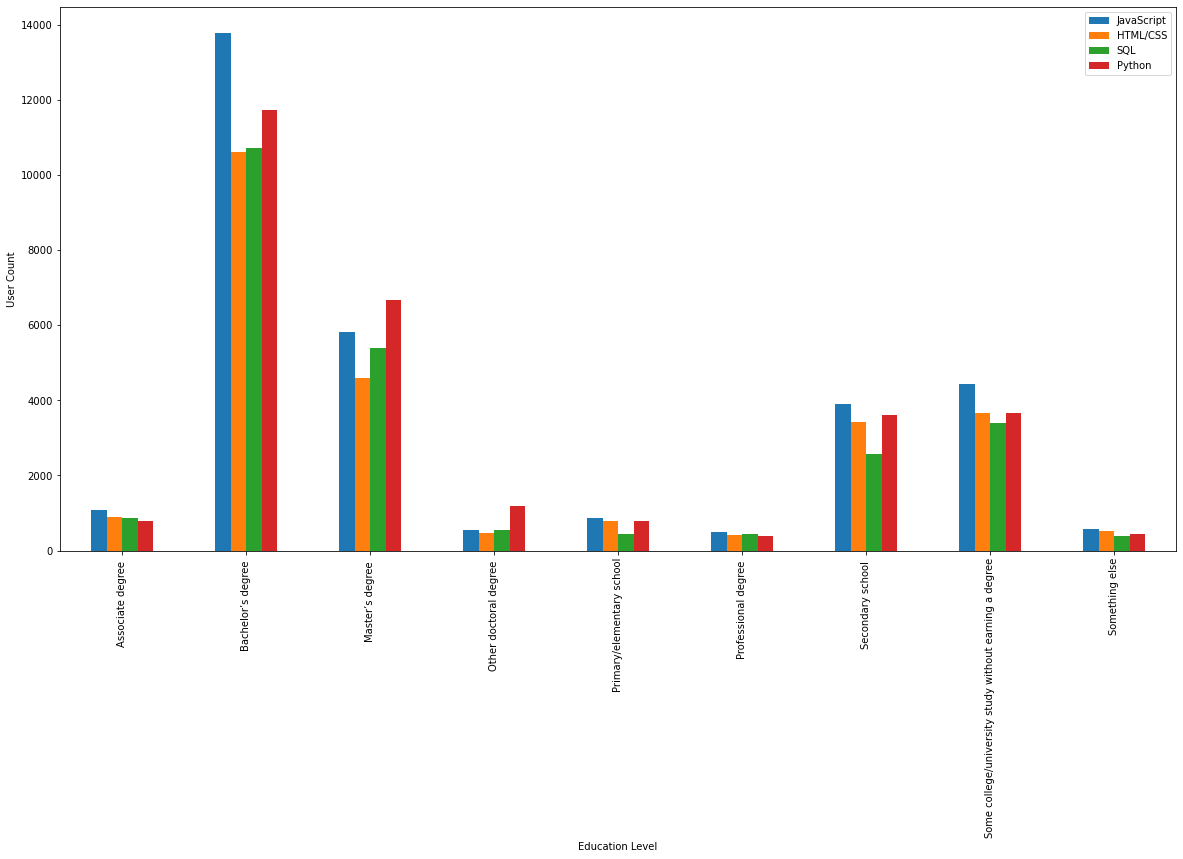

In [6]:
LAN_list = ["JavaScript","Python","typescript","HTML/CSS","SQL","Java;","Bash/Shell","C#","C++;", "PHP",'go']
df_ll = df22[df22['LanguageWantToWorkWith'].str.contains('Python', na = False , case = False)].groupby('EdLevel').count()
for i in LAN_list:
    if i == "C#" or i == "C++;":
        df_ll[i] = df22[df22['LanguageWantToWorkWith'].str.contains(i, na = False, case = False, regex  = False )].groupby('EdLevel').count()['LanguageWantToWorkWith']
    else:    
        df_ll[i] = df22[df22['LanguageWantToWorkWith'].str.contains(i, na = False , case = False)].groupby('EdLevel').count()['LanguageWantToWorkWith']
# df_ll[LAN_list].plot(kind = 'bar', figsize = (20,10))
df_ll[["JavaScript","HTML/CSS","SQL","Python"]].plot(kind = 'bar', figsize = (20,10))
plt.xlabel('Education Level')
plt.ylabel('User Count')
plt.show()